# Hacettepe University Department of Computer Engineering
# BBM 409 - Fall 2019
# Second Assignment
## Name: Mert Çökelek
## ID: 21727082

#####################################################################################################
# REPORT AND CODE

# Part I: Theory Questions
## MLE
### Question 1.
Since there are **'m'** instances and they are uniformly distritubed in range **'-w, +w'**, for any given value in this space, has likelood: **1 / 2w**

#### 1.1
* **F(W) = (1/2W)^m**
$$F ( W\ ) = \prod _ { i = 1 } ^ { m } P \left( X _ { i } | \ W\right) = \left( \frac { 1 \ } { 2W } \right) ^ { m } $$


#### 1.2
* MLE argmax_W(P(x1, x2....xm | W) = argmaxTheta(1/W^m).
* Because there are m instances with equal probability. All MLE are equal 


* So, **MLE = max{x1, x2, .... xm} = x_max.**

#### 1.3
* Dataset should be linearly non-seperable to not being performed well. So, it can be {(xi, yi)} = {(1, 0), (2, 1), (3, 0) ,(4, 0), (5, 1)}.


### Question 2. 
* **True**. It looks mean and variance for all the occurences in dataset.
* **False**. Because Bayesian approach can work well with small datasets, when the number of features are large.

## Naive Bayes
### Question 1.
#### 1.1
* **Answer: 1/2**
* P(C = 1|x = 1, y = 1, z = 0) = P(C = 1, x = 1, z = 1, C = 0)/P(x = 1, y = 1, z = 0)
* =P(C = 1) * P(x = 1|C = 1) * P(y = 1|C = 1) * P (z = 0|C = 1)/ P(x = 1, y = 1, z = 0, C = 1) + P(x = 1, y = 1, z = 0, C = 0)
* = (1/2 * 1/2 * 1/4 * 1) / 1/8
* = 1/16 / 1/8
* = 1/2



#### 1.2
* **Answer: 1/2**
* P(C = 0|x = 1, y = 1) = P(C = 0, x = 1 , y = 1)/P(x = 1 ∧ y = 1)
* = P(C = 0) * P(x = 1|C = 0) * P(y = 1|C = 0)/ P(x = 1, y = 1, C = 1) + P(x = 1, y = 1, C = 0).
* = P(C = 0) * P(X = 1)
* P(C = 0|x = 1, y = 1) = (a) / (a+b)
* a = P(x=1, y=1|C=1) * P(C=1)
* b = P(x=1, y=1|C=0) * P(C=0)
* a = 1/2 * 1/2
* b = 1/2 * 1/2



#### 1.3
* **Answer: 0**
* P(C = 1|x = 1, y = 1, c = 0). **There doesn't exist such an entry in the table, so joint naive bayes is equal to 0**

#### 1.4
* **Answer: 1/2**
* **P(C = 0|x = 1, y = 1)** = **count**(C = 0, a = 1, y = 1) / **count**(x = 1, y = 1)** = 1/2.

### Question 2.

#### 2.1
* **Answer: Not enough information**.
* We need also at least P(C)

#### 2.2

* **Answer: Not enough information.**
* We need also P(C)

#### 2.3

* **Answer: 2/3.**
* P(B) = 1 => P(C|A, B) = P(C|A). So, P(C|A, B) = P(C, A) / P(A) = 0.2 / 0.3 = 2/3.


# Part II: Detection of Fake News

## INTRODUCTION
To classify if a news text is real or it is fake, Naive Bayes Classifier is a successful and efficient, commonly used classifier.
Naive Bayes Classifier is mostly used for text classification.

## Naïve Bayes Classifier
* The train data must have a pre-given label. (In our case, 0 for Real News; 1 for Fake News.)
* Given a dataset as text-label pairs, Naive Bayes first groups the text according to their labels.
* For for every **label(class)**, it assumes that every single word in that text are **independent**. 
* After grouping texts, it calculates probabilities for every single word in that text.
* It uses a **'Bag of Words'** model in which the order of the words are insignificant.
* These probabilities correspond to the conditional probabilities of a word, given the class label.
* The probability(likelihood) of a word in BoW is calculated with the formula:$$   P(w|c) = \frac{n(c) + 1}{count(c)+|V|}$$


* Here, the +1 comes from the idea **'Laplace Smoothing'**.  If a word does not occur in that class, it gives that word a small probability, rather than pure zero.

### Getting the Data:

* First, taking the .csv files as pandas dataframe
* Removing **NaN** values from **'text'** and **'title'** columns to prevent the noise in data.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


data = pd.read_csv('fake_news_train.csv') 
data['title'] = data['title'].fillna(value='') # Replace NaNs with empty string.
data = data[pd.notnull(data['text'])]          # Remove NaNs from 'text' column in dataset.
data = data[data['text'].map(len) > 2]         # Remove empty strings from texts.

* Printing the dataframe, to see if the data is taken correctly.

In [2]:
data

,id,title,author,text,label
0,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
1,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
2,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
3,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
4,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
...,...,...,...,...,...
16635,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
16636,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
16637,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
16638,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


#### Splitting data into train and test sets. 
* Kaggle input will be used as the validation set.
* Sorting train data provides easy slicing of real and fake news.


In [3]:
Train, Test = train_test_split(data, test_size=0.20)
Train = Train.sort_values(by=['label'])

## Here are the helper functions, which will be used in Part1, Part2, Part3, Part4.


### Function 1 := Vectorize()
* This function uses a vectorizer (CountVectorizer or TfidfVectorizer) and fits the train and test data into a common vector.
* **train vector** is created by **'fit_transform()'** because the words in the test data will be compared according to this vector.
* **test vector** is created by **'transform()'** because we need the indices of the words in test files to be the same as in the train file.
* **rating_probs:** ratio of zero-label, one-label. Used for calculating **Priors**
* **bow:** Bag of Words.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def Vectorize(vectorizer, feature, train, test, stop_words=None, ngram = 1):
    if vectorizer == 'CountVectorizer':
        if stop_words==None:
            vector = CountVectorizer(ngram_range=(ngram, ngram))
        else:
            vector = CountVectorizer(analyzer='word', stop_words=stop_words, ngram_range=(ngram, ngram))
            
    elif vectorizer == 'TfidfVectorizer':
        if stop_words==None:
            vector = TfidfVectorizer(ngram_range=(ngram, ngram))
        else:
            vector = TfidfVectorizer(analyzer='word', stop_words=stop_words, ngram_range=(ngram, ngram))

    train_vector = vector.fit_transform(train[feature])  
    test_vector = vector.transform(test[feature].apply(lambda x: np.str_(x)))  
    
    rating_probs = train.groupby('label').size().div(len(train))
    P_real = rating_probs[0]
    P_fake = rating_probs[1]
    
    bow = vector.get_feature_names()
    
    train_ = [train_vector, P_real, P_fake, bow]
    test_ = [test_vector]
    return train_, test_

### Function 2 := naive_bayes()
* This function uses the **Vectorize()** functioni which was created in the previous cell.
* **The parameters are:**
* **1-feature:** feature stands for either 'title' or 'text'. **Title** will be used in **Part1** of this assignment, to make classification according to the title of the news; and see if it is feasible to use only Titles.
* **2-train_data, test_data:** The pandas dataframes, which were created by **Train_test_split()** method.
* **real_size:** The number of real news in the training set. Used for slicing the dataset.
* **analyzer, stop_words:** None or 'English', to see their effects on accuracy.
* **ngram:** Can be 1 or 2. 

### Implementing Naive Bayes:
* **PARAMETERS:** train_data and test_data: the datasets. real_size: number of real news in train data.
* **stop_words:** stopwords are the common and insignificant-for-fake-detections, so it maybe useful to use them.
* **ngramrange:** Determines how the words from BoW will be taken. 1-1, or 2-2.
* **THESE PARAMETERS ARE VARIABLE, SO EVERY POSSIBLE COMBINATION WILL BE CALCULATED TO PICK THE MOST ACCURATE ONE**

#### Inside the function:
* **news:** number of test text
* **real, fake:** in the train data, real news are labeled via 0, fake news are labeled via 1.
* **P_words_given_real/fake:** The indepentent probabilities of the words in BoW, for real and fake news, seperately.
* **P_Real, P_Fake:** The class priors. Required for prediction.
* **predictions:** an array of 0-1s, corresponding to every single text in test file.
* In for loop, i corresponds to i'th text in test. 
* **preal, pfake:** are calculated by log probabilities of the total likelihoods of the words in test words.
* This final operation is complicated. In a brute-force solution, 2 for loops required(1 for text number, 1 for word in that text). **In my solution**, the words obtained from i'th text in test data are gathered from the train's real and fake parts, with a matrix.
* The matrix calculation provides a fast and simple way to calculate total log probabilities of the words in text.
* With one-line matrix calculation, I can calculate the log probabilities of the words.


In [5]:
Real_news_number = Train[Train['label'] == 0].shape[0]

def naive_bayes(vectorizer, feature, train_data, test_data, real_size, stop_words=None, ngram = 1 ):
    train, test = Vectorize(vectorizer, feature, train_data, test_data, stop_words=stop_words, ngram=ngram)
    Train_Vector, P_Real, P_Fake, Bow_Train = train[0], train[1], train[2], train[3]
    Test_Vector = test[0]
    
    bowLen = len(Bow_Train)    
    news = Test_Vector.shape[0]
    
    
    real = Train_Vector[:real_size]
    fake = Train_Vector[real_size:]
    
    P_words_given_real = np.log10((real.sum(axis=0)+1) / (real.sum() + bowLen))
    P_words_given_fake = np.log10((fake.sum(axis=0)+1) / (fake.sum() + bowLen))
    
    P_Real = np.log10(P_Real)
    P_Fake = np.log10(P_Fake)
    
    predictions = []
    for i in range(news):
        preal, pfake = P_Real, P_Fake # Class priors.
        
        test_text = Test_Vector[i] # i'th text in test news.
        
        cols = test_text.nonzero()[1] # the existing words in text are taken. If a word does not exist, it is unnecessary for our calculation.
        
        preal += test_text[0,cols].multiply(P_words_given_real[0, cols]).sum() # Existing words are taken from real news.
        pfake += test_text[0,cols].multiply(P_words_given_fake[0, cols]).sum() # Existing words are taken from fake news.
         
        if(preal >= pfake):
            predictions.append(0)
        else:
            predictions.append(1)
    return predictions



### Function 3 := accuracy()
* This is a simple function that takes the **prediction matrix**(which was created by naive_bayes(), and **compares** its differences between the **Correct Labels**, to print the success rate.

In [6]:
def accuracy(predictions, actual):
    err = 0
    Len = len(predictions)
    for i in range(Len):
        err += np.abs(predictions[i] - actual[i])
        
    err = err / Len
    return((1-err) *100)


# Part 1: Understanding the Data
* In this part, Naive Bayes will be applied to headlines of the news. To check if it is feasible to classify by titles.


In [7]:
prediction_by_headlines_1 = naive_bayes('CountVectorizer','title', Train, Test, Real_news_number, ngram=1)
prediction_by_headlines_2 = naive_bayes('CountVectorizer','title', Train, Test, Real_news_number, ngram=2)
prediction_by_headlines_3 = naive_bayes('CountVectorizer','title', Train, Test, Real_news_number, ngram=3)
prediction_by_headlines_4 = naive_bayes('CountVectorizer','title', Train, Test, Real_news_number, ngram=4)

In [8]:
print("Accuracy by headlines, 1-gram:", accuracy(prediction_by_headlines_1, Test['label'].values))
print("Accuracy by headlines, 2-gram:", accuracy(prediction_by_headlines_2, Test['label'].values))
print("Accuracy by headlines, 3-gram:", accuracy(prediction_by_headlines_3, Test['label'].values))
print("Accuracy by headlines, 4-gram:", accuracy(prediction_by_headlines_4, Test['label'].values))


Accuracy by headlines, 1-gram: 87.91540785498489
Accuracy by headlines, 2-gram: 80.60422960725076
Accuracy by headlines, 3-gram: 67.0392749244713
Accuracy by headlines, 4-gram: 58.42900302114804


* As an average of 10 random runs, the average accuracy of classifying **only by titles** is **87-88%**.
* **Using Unigram** is ~88%, where **Using Bigram** is ~80%.
* Incrementing the n-gram, accuracy decreased.
* This may be because the titles are already short, using double-triple word pairs may result noise and uncertainity.

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

def PART_1_get_3_words(real_or_fake, train):
    if real_or_fake == 'real':
        news = train[train['label'] == 0]
    else:
        news = train[train['label'] == 1]
    
    cv = CountVectorizer(analyzer='word', stop_words='english')
    word_count_vector = cv.fit_transform(news['title'])
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer.fit(word_count_vector)
    df = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(), columns=['IDF Weights'])

    df.sort_values(by=['IDF Weights'], ascending=True, inplace=True)

    return df[:3]

In [10]:
title_real_3_words = PART_1_get_3_words('real', data)
title_real_3_words

,IDF Weights
new,1.493855
times,1.505349
york,1.507344


* These are the **top 3 words** most strongly predicting the news is real.

In [11]:
title_fake_3_words = PART_1_get_3_words('fake', data)
title_fake_3_words

,IDF Weights
trump,2.995065
hillary,3.315418
clinton,3.470799


* These are the **top 3 words** most strongly predicting the news is fake.
* Using these words for train dataset has an outcome with **88%** accuracy.
* **So, it may be feasible for predicting news by headlines**
* But, the accuracy can be better.
* Let's try Naive Bayes solution for Texts in news.

# Part 2: Implementing Naive Bayes
* In first part, classifying by 'Titles' was not successful enough.
* In this part, we are going to use the **naive_bayes()** function **for the test data.**
* I encountered the **unseen words in test data** by simply giving them **0 probability**, and after that with **Laplace Smoothing**, they took a small probability.
### The next cell can take 2-3 minutes to run, because 'Bigram' Naive Bayes takes a long time.

In [12]:
Predictions = dict()
Predictions['Using Text, 1-gram, no stop_words'] = naive_bayes('CountVectorizer','text', Train, Test, Real_news_number)
Predictions['Using Text, 2-gram, no stop_words'] = naive_bayes('CountVectorizer','text', Train, Test, Real_news_number, ngram=2)


In [13]:
for key, value in Predictions.items():
    print(key, '\t' ,accuracy(value, Test['label'].values))

Using Text, 1-gram, no stop_words 	 90.18126888217523
Using Text, 2-gram, no stop_words 	 91.45015105740183


* Accuracy of the predictions are calculated.
* The **accuracy** is now about **90-92%**.
* **There is** an **improvement** since using headlines, but **still can be better**.

 * Using **Bigram**, the accuracy increased about 1.5%. 
 * This is because, there can be some word-pairs which have a different meaning than the singular ones. 
 * When **adjacent single words** are combined together, their meaning and the news' reality prediction changes.

# Part 3: 
### 3a, 3b: Analyzing the effects of words on prediction:


In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

def print_10_words(train):
    
    real_df = pd.DataFrame(train[train['label'] == 0])
    fake_df = train.drop(real_df.index)

    # Bag of Words for Real news. With their frequencies, helper = TfidfTransformer
    cv1 = CountVectorizer()
    word_count_vector1 = cv1.fit_transform(real_df['text'])
    tfidf_transformer1 = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer1.fit(word_count_vector1)
    bow1 = cv1.get_feature_names()
    
    # Bag of Words for Fake news. With their frequencies, helper = TfidfTransformer

    cv2 = CountVectorizer()
    word_count_vector2 = cv2.fit_transform(fake_df['text'])
    tfidf_transformer2 = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer2.fit(word_count_vector2)
    bow2 = cv2.get_feature_names()

    
#     real_bow = set(bow1) - set(bow2) # Remove the words in Fake news, from the Real news.
#     fake_bow = set(bow2) - set(bow1) # Remove the words in Real news, from the Fake news.

    # Create DataFrames for good visual.
    
    real = pd.DataFrame(list(zip(bow1, tfidf_transformer1.idf_)),columns=['Word', 'IDF-Weight'])
    fake = pd.DataFrame(list(zip(bow2, tfidf_transformer2.idf_)), columns=['Word', 'IDF-Weight'])
    
    real_ = real.loc[real['Word'].isin(bow1)]
    fake_ = fake.loc[fake['Word'].isin(bow2)]

    real_prs = real_.nsmallest(10, 'IDF-Weight') # Presence most strongly predicts real news
    fake_prs = fake_.nsmallest(10, 'IDF-Weight') # Presence most strongly predicts fake news
    real_abs= real_.nlargest(10, 'IDF-Weight')   # Absence most strongly predicts real news
    fake_abs = fake_.nlargest(10, 'IDF-Weight')  # Absence most strongly predicts fake news
    
    return real_prs, real_abs, fake_prs, fake_abs

In [15]:
Real_presence, Real_absence, Fake_presence, Fake_absence = print_10_words(data)

In [16]:
Real_presence

,Word,IDF-Weight
79129,the,1.001324
79998,to,1.006394
55956,of,1.007968
4667,and,1.009181
38802,in,1.017345
56295,on,1.020041
79110,that,1.033255
30090,for,1.051825
40546,is,1.065084
86970,with,1.085177


#### Top 10 words whose presence most strongly predicts that the news is real.
* **Low weight** means that word **occurs more**, in that label.
* These are some **English stop words** and they can both appear in **real news/fake news**. 
* Since they can appear on both labels, **occurence** will not change our program's **accuracy on real news.**

In [17]:
Real_absence

,Word,IDF-Weight
2,0000,9.332789
3,0001,9.332789
4,000s,9.332789
8,0024,9.332789
9,003,9.332789
14,00pm,9.332789
17,0102,9.332789
18,012,9.332789
19,0134,9.332789
20,015,9.332789


### Top 10 words whose absence most strongly predicts that the news is real:
* **High weight** means that word **occurs least**. 
* So it is logical that **these words' absence** will **increase** our program's **accuracy on real news.**
* We can see that these words are **meaningless words**. So they do **nothing but confusing** the datasets.**

In [18]:
Fake_presence

,Word,IDF-Weight
87865,the,1.091892
88767,to,1.123950
62699,of,1.133202
6342,and,1.141561
44526,in,1.154373
46934,is,1.222082
87847,that,1.227555
63164,on,1.228623
35085,for,1.243229
47111,it,1.308005


#### Top 10 words whose presencee most strongly predicts that the news is fake.
* **Low weight** means that word **occurs most** in that label.** 
* These are some **English stop words** and they can both appear in **real news/fake news**. 
* Since they can appear on both labels, **occurence** will not change our program's **accuracy on real news.**

In [19]:
Fake_absence

,Word,IDF-Weight
2,0000,9.323001
3,0001,9.323001
4,00012,9.323001
5,0002,9.323001
6,000202,9.323001
7,000205,9.323001
8,000billion,9.323001
9,000emails,9.323001
10,000ft,9.323001
11,000k,9.323001


#### Top 10 words whose absence most strongly predicts that the news is fake.
* We can see that all of these words are **meaningless words**. 
* **High weight** means that word **occurs least**. 
* So it is logical that these words' **absence** will **increase** our program's **accuracy on fake news.**
* They do **nothing but confusing** the program. **They are meaningless.**

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

def print_10_words_without_stopwords(train):
    
    real_df = pd.DataFrame(train[train['label'] == 0])
    fake_df = pd.DataFrame(train[train['label'] == 1])

    # Bag of Words for Real news. With their frequencies, helper = TfidfTransformer
    cv1 = CountVectorizer()
    word_count_vector1 = cv1.fit_transform(real_df['text'])
    tfidf_transformer1 = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer1.fit(word_count_vector1)
    bow1 = cv1.get_feature_names()
    
    # Bag of Words for Fake news. With their frequencies, helper = TfidfTransformer

    cv2 = CountVectorizer()
    word_count_vector2 = cv2.fit_transform(fake_df['text'])
    tfidf_transformer2 = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer2.fit(word_count_vector2)
    bow2 = cv2.get_feature_names()

    
    real_bow = set(bow1) - set(bow2) # Remove the words in Fake news, from the Real news.
    fake_bow = set(bow2) - set(bow1) # Remove the words in Real news, from the Fake news.

    # Create DataFrames for good visual.
    
    real = pd.DataFrame(list(zip(bow1, tfidf_transformer1.idf_)),columns=['Word', 'IDF-Weight'])
    fake = pd.DataFrame(list(zip(bow2, tfidf_transformer2.idf_)), columns=['Word', 'IDF-Weight'])
    
    real_ = real.loc[real['Word'].isin(real_bow)]
    fake_ = fake.loc[fake['Word'].isin(fake_bow)]

    real_nonstop = real_.nsmallest(10, 'IDF-Weight') # Presence most strongly predicts real news
    fake_nonstop = fake_.nsmallest(10, 'IDF-Weight') # Presence most strongly predicts fake news
 
    return real_nonstop, fake_nonstop

### 3c: Analyzing the effects of stopwords:
* **Stopwords** can and will occur in almost all of the texts, **regardless it is real or fake.**

* So **removing** them can **reduce noise** and **increase speed.**

#### In the next part (Part 4), we will see the effects of using stopwords, TF-IDF, different n-gram values.

### The next cell contains 8 different combinations of the Hyperparameters.
### (Naive Bayes function is called 8-times, with different parameters)
### So the running can take about 10 minutes.
### If you don't run, there is a sample output of the next cell.

In [21]:
Real_nonstop, Fake_nonstop = print_10_words_without_stopwords(data)

In [22]:
Real_nonstop

,Word,IDF-Weight
57845,pamkeynen,4.784190
1893,_____,4.872645
79774,tillerson,5.128097
41406,jeromeehudson,5.135588
37820,huston,5.325456
33225,gorsuch,5.353108
38258,igcolonel,5.362498
85618,warnerthuston,5.362498
24727,dznussbaum,5.410816
34958,hanchett,5.493337


* **These are the top 10 non-stop words, predicting real news most strongly.**
* Low weight means higher occurence in that label.
* And obviously these are possible **unsuspicious words** for a real news

In [23]:
Fake_nonstop

,Word,IDF-Weight
42985,http,3.954692
59163,multi,4.934744
42984,html,5.110874
116385,что,5.148614
109500,по,5.164118
107313,не,5.220358
80062,sheeple,5.237025
105021,как,5.262558
104455,из,5.371758
103808,за,5.410978


* **These are the top 10 non-stop words, predicting the fake news most strongly.**
* Low weight means higher occurence for that label.
* We see some **Links, such as 'http, html'** and some foreign words.
* Also, those Russian words are **Russian Stopwords**, so they can also be ignored from the dataset.
* These are obviously **suspicious words for a news**.

In [24]:
Predictions = dict()
Predictions['CountVectorizer, 1-gram, with stop_words'] = naive_bayes('CountVectorizer', 'text', Train, Test, Real_news_number)
Predictions['CountVectorizer, 2-gram, with stop_words'] = naive_bayes('CountVectorizer','text', Train, Test, Real_news_number, ngram=2)
Predictions['CountVectorizer, 1-gram, no stop_words'] = naive_bayes('CountVectorizer','text', Train, Test, Real_news_number, stop_words='english')
Predictions['CountVectorizer, 2-gram, no stop_words'] = naive_bayes('CountVectorizer','text', Train, Test, Real_news_number, ngram=2, stop_words='english')

# Predictions['TF-IDF, 1-gram, with stop_words'] = naive_bayes('TfidfVectorizer', 'text', Train, Test, Real_news_number)
# Predictions['TF-IDF, 2-gram, with stop_words'] = naive_bayes('TfidfVectorizer', 'text', Train, Test, Real_news_number, ngram=2)
# Predictions['TF-IDF, 1-gram, no stop_words'] = naive_bayes('TfidfVectorizer', 'text', Train, Test, Real_news_number, stop_words='english')
# Predictions['TF-IDF, 2-gram, no stop_words'] = naive_bayes('TfidfVectorizer', 'text', Train, Test, Real_news_number, ngram=2, stop_words='english')


# Part 4: Prediction / Accuracy

* **This was the output when I ran this code on my PC.**
* In the previous cell, **the last 4 lines** are **commented**. Because using **TF-IDF** in this large dataset took approximately 10 minutes.
* **If you'd like to see the outputs anyway, there is a sample screenshot from one of my runs**.
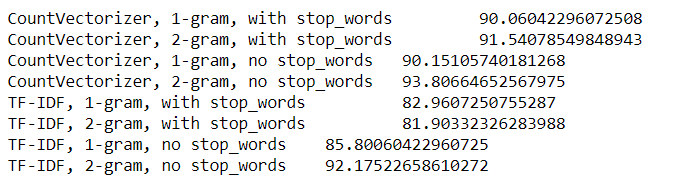
### From the output, what we conclude are:
* **Setting n-gram** range **to 2 incremented accuracy** by 1-7%.
* This is **because** there are so many unique words in dataset and **combining them together increments** number of total features.
* **The more feature numbers the better Naive Bayes works**, since it's fed from large amount of features.
* **Removing StopWords** from the dataset **incremented the accuracy** by 5-10%.
* This is **because**, these **stop words can occur** in **both real and fake news**. Using them and making predictions is not a good idea. 

In [25]:
for key, value in Predictions.items():
    print(key , '\t',accuracy(value, Test['label'].values))

CountVectorizer, 1-gram, with stop_words 	 90.18126888217523
CountVectorizer, 2-gram, with stop_words 	 91.45015105740183
CountVectorizer, 1-gram, no stop_words 	 89.15407854984895
CountVectorizer, 2-gram, no stop_words 	 92.62839879154079
